In [1]:
# !pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

  Using cached pandas-2.3.1-cp311-cp311-win_amd64.whl (11.3 MB)
  Using cached numpy-2.3.1-cp311-cp311-win_amd64.whl (13.0 MB)
  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl (10.7 MB)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.58.5-cp311-cp311-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
  Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl (7.0 MB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
                                              0.0/38.6 MB ? eta -:--:--
                                              0.1/3


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------                           13.5/38.6 MB 40.9 kB/s eta 0:10:12
     -------------                           13.5/38.6 MB 40.9 kB/s eta 0:10:12
     -------------                           13.5/38.6 MB 40.9 kB/s eta 0:10:12
     -------------                           13.5/38.6 MB 40.9 kB/s eta 0:10:12
     -------------                           13.5/38.6 MB 40.9 kB/s eta 0:10:12
     -------------                           13.5/38.6 MB 40.9 kB/s eta 0:10:12
     -------------                           13.5/38.6 MB 40.9 kB/s eta 0:10:12
     -------------                           13.5/38.6 MB 40.9 kB/s eta 0:10:12
     -------------                           13.5/38.6 MB 40.9 kB/s eta 0:10:12
     -------------                           13.5/38.6 MB 40.9 kB/s eta 0:10:12
     -------------                           13.5/38.6 MB 40.8 kB/s eta 0:10:14
     -------------                           13.5/38.6 MB 40.8 kB/s eta 0:10:14
     -------------                     

In [2]:
# Student Track Prediction - Complete ML Pipeline
# Predicting Track_Name based on student features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(np.__version__)

2.3.1


In [4]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== STEP 1: DATA LOADING AND INITIAL EXPLORATION ===")

=== STEP 1: DATA LOADING AND INITIAL EXPLORATION ===


In [10]:
# Load the dataset
df = pd.read_csv('After some cleaning.csv')  

print(f"Dataset shape: {df.shape}")

Dataset shape: (1903, 23)


In [11]:
print(f"Columns: {df.columns.tolist()}")

Columns: ['Student_ID', 'Student_Fname', 'Student_Lname', 'Student_Address', 'Student_Name', 'Gender', 'Faculty', 'Certification_Field', 'Certification_Soutce', 'Company_Name', 'Company_location', 'Company_Type', 'Company_Filed', 'Jop_Website', 'Jop_Category', 'Jop_Title', 'Jop_Statue', 'Course_ID', 'Intake_ID', 'Track_Name', 'Track_Branch', 'Dept_Name', 'Course_Name']


In [12]:
print("\nFirst few rows:")
print(df.head())


First few rows:
     Student_ID Student_Fname Student_Lname Student_Address    Student_Name  \
0  1.000000e+13         Ahmed       Ibrahim           Sohag  Ahmed  Ibrahim   
1  1.000000e+13       Mohamed          Nasr           Sohag   Mohamed  Nasr   
2  1.000000e+13          Omar          Adel            Giza      Omar  Adel   
3  1.000000e+13           Ali       Soliman            Qena    Ali  Soliman   
4  1.000000e+13         Fatma         Fawzy        Dakahlia    Fatma  Fawzy   

  Gender   Faculty   Certification_Field Certification_Soutce  \
0      M  Commerce   Backend Development    LinkedIn Learning   
1      M       Law   Backend Development    LinkedIn Learning   
2      M  Pharmacy  Database Developmnet             DataCamp   
3      M  Medicine        Graphic Design    LinkedIn Learning   
4      F  Pharmacy        Graphic Design    LinkedIn Learning   

        Company_Name  ... Jop_Website      Jop_Category             Jop_Title  \
0              Cisco  ...      Topta

In [13]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            1903 non-null   float64
 1   Student_Fname         1903 non-null   object 
 2   Student_Lname         1903 non-null   object 
 3   Student_Address       1903 non-null   object 
 4   Student_Name          1903 non-null   object 
 5   Gender                1903 non-null   object 
 6   Faculty               1903 non-null   object 
 7   Certification_Field   1903 non-null   object 
 8   Certification_Soutce  1903 non-null   object 
 9   Company_Name          1903 non-null   object 
 10  Company_location      1903 non-null   object 
 11  Company_Type          1903 non-null   object 
 12  Company_Filed         1903 non-null   object 
 13  Jop_Website           1903 non-null   object 
 14  Jop_Category          1903 non-null   object 
 15  Jop_Ti

In [14]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Student_ID                 0
Student_Fname              0
Student_Lname              0
Student_Address            0
Student_Name               0
Gender                     0
Faculty                    0
Certification_Field        0
Certification_Soutce       0
Company_Name               0
Company_location           0
Company_Type               0
Company_Filed              0
Jop_Website                0
Jop_Category               0
Jop_Title                  0
Jop_Statue                 0
Course_ID               1530
Intake_ID               1530
Track_Name              1530
Track_Branch            1530
Dept_Name               1530
Course_Name             1530
dtype: int64


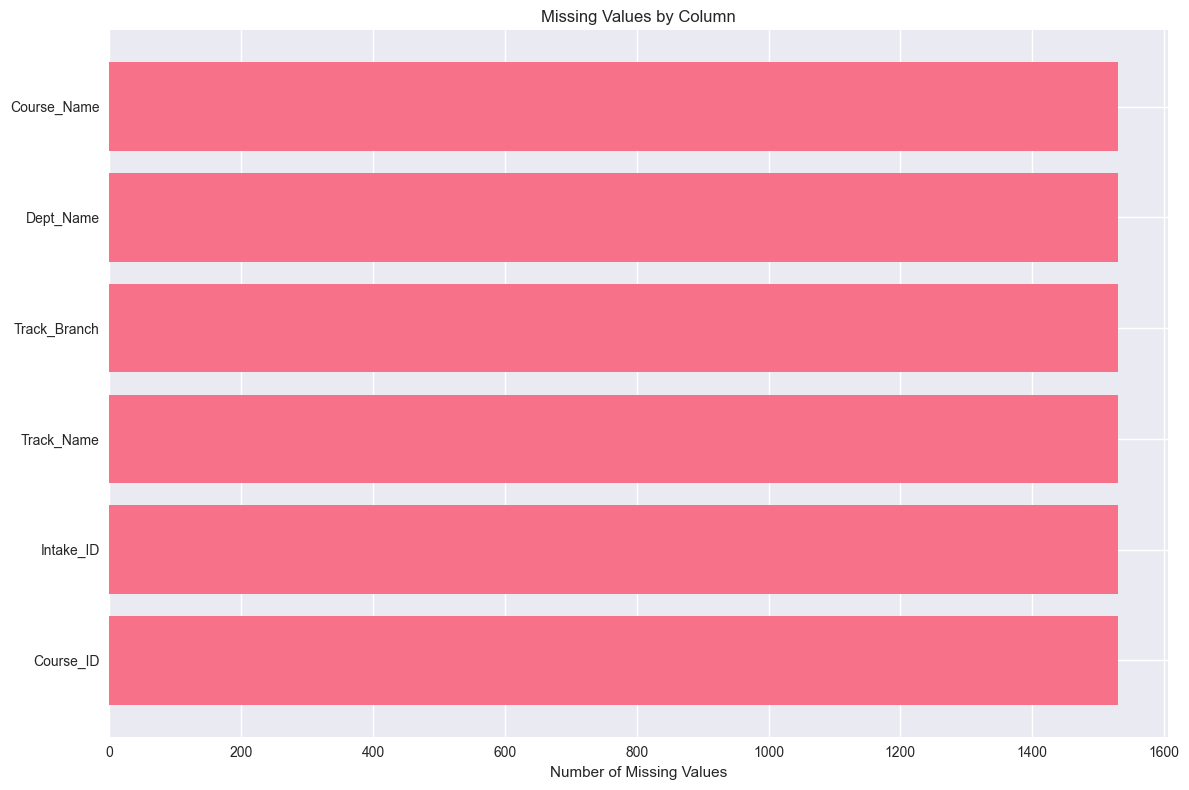

In [15]:
# Visualize missing values
plt.figure(figsize=(12, 8))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
plt.barh(missing_data.index, missing_data.values)
plt.title('Missing Values by Column')
plt.xlabel('Number of Missing Values')
plt.tight_layout()
plt.show()

In [16]:
print("\n=== STEP 2: DATA PREPROCESSING AND CLEANING ===")
# Create a copy for preprocessing
df_processed = df.copy()


=== STEP 2: DATA PREPROCESSING AND CLEANING ===


In [17]:
# Remove columns that cause data leakage or are not useful for prediction
columns_to_drop = [
    'Student_ID', 'Student_Fname', 'Student_Lname', 'Student_Address', 'Student_Name',
    'Jop_Website', 'Jop_Statue', 'Course_ID', 'Intake_ID', 'Course_Name'
]

In [18]:
# Drop columns that exist in the dataset
df_processed = df_processed.drop([col for col in columns_to_drop if col in df_processed.columns], axis=1)

In [19]:
# Handle missing values in target variable
print(f"Missing values in Track_Name: {df_processed['Track_Name'].isnull().sum()}")
df_processed = df_processed.dropna(subset=['Track_Name'])

Missing values in Track_Name: 1530


In [20]:
# Fill missing values for categorical variables
categorical_columns = df_processed.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'Track_Name':  # Don't fill target variable
        df_processed[col] = df_processed[col].fillna('Unknown')

In [22]:
print(f"Dataset shape after cleaning: {df_processed.shape}")
print(f"Remaining missing values: {df_processed.isnull().sum().sum()}")

Dataset shape after cleaning: (373, 13)
Remaining missing values: 0



=== STEP 3: EXPLORATORY DATA ANALYSIS ===


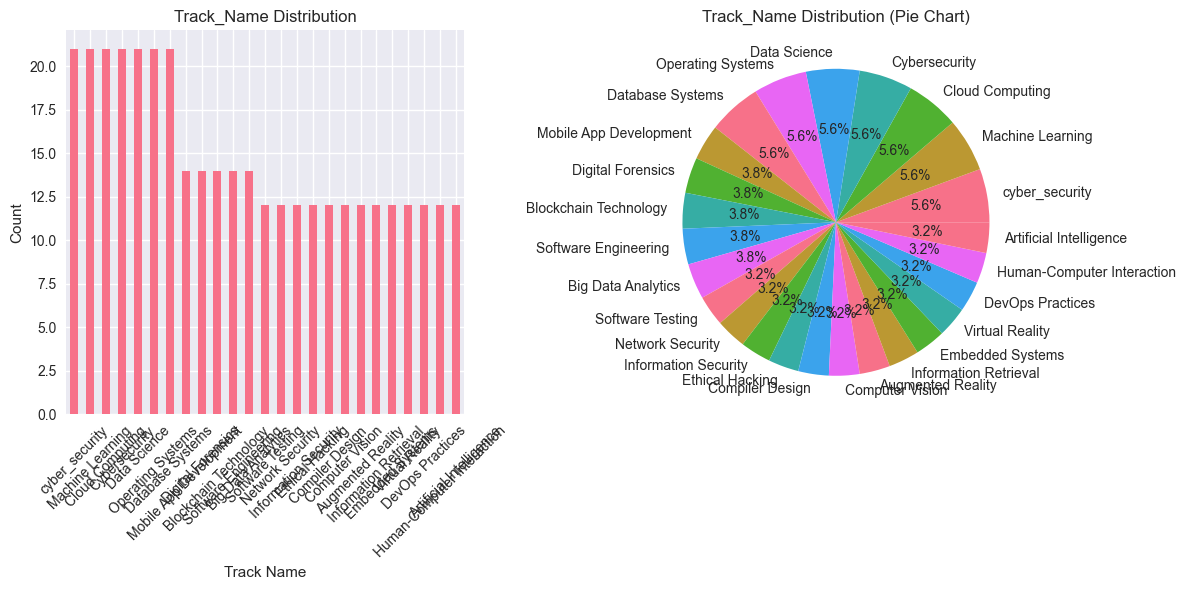

In [23]:
print("\n=== STEP 3: EXPLORATORY DATA ANALYSIS ===")

# Target variable distribution
plt.figure(figsize=(12, 6))
track_counts = df_processed['Track_Name'].value_counts()
plt.subplot(1, 2, 1)
track_counts.plot(kind='bar')
plt.title('Track_Name Distribution')
plt.xlabel('Track Name')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(track_counts.values, labels=track_counts.index, autopct='%1.1f%%')
plt.title('Track_Name Distribution (Pie Chart)')
plt.tight_layout()
plt.show()

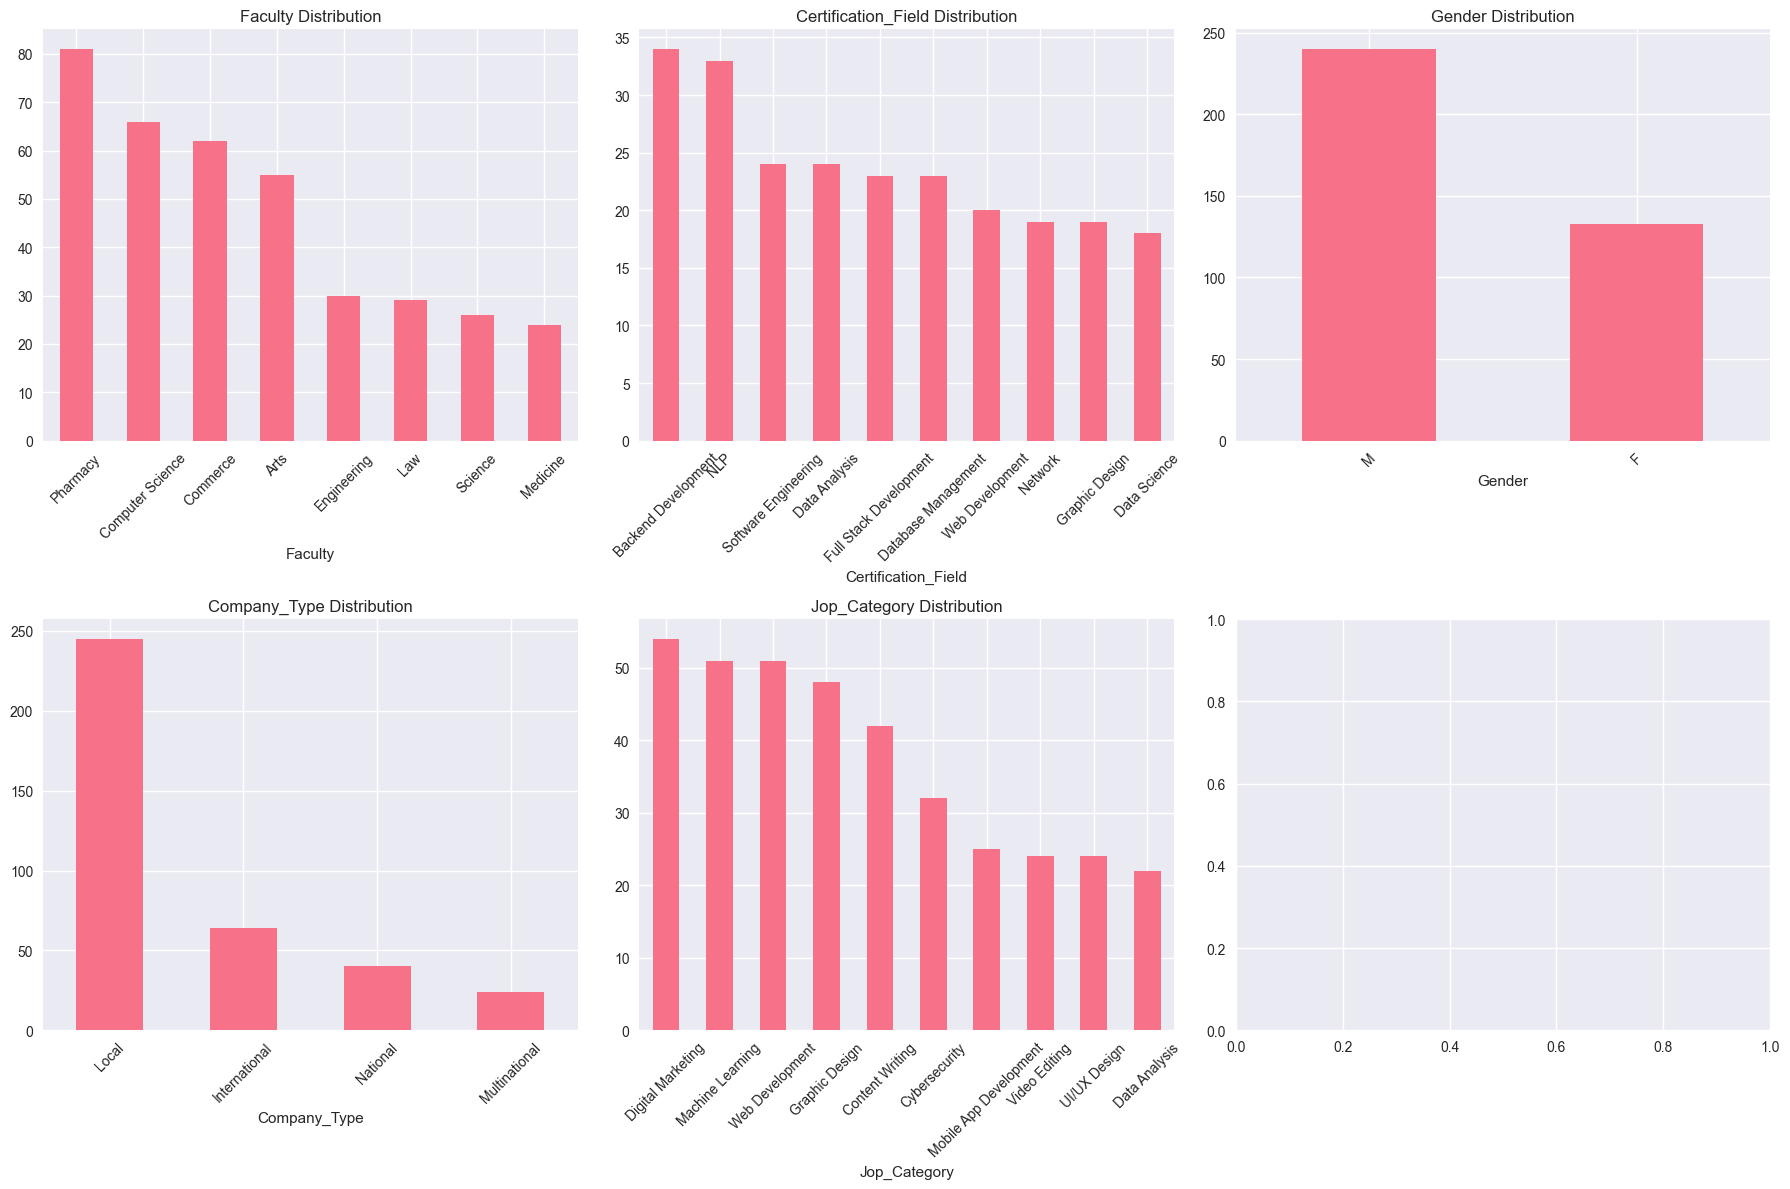

In [24]:
# Key feature distributions
features_to_analyze = ['Faculty', 'Certification_Field', 'Gender', 'Company_Type', 'Jop_Category']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_analyze):
    if feature in df_processed.columns:
        df_processed[feature].value_counts().head(10).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{feature} Distribution')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

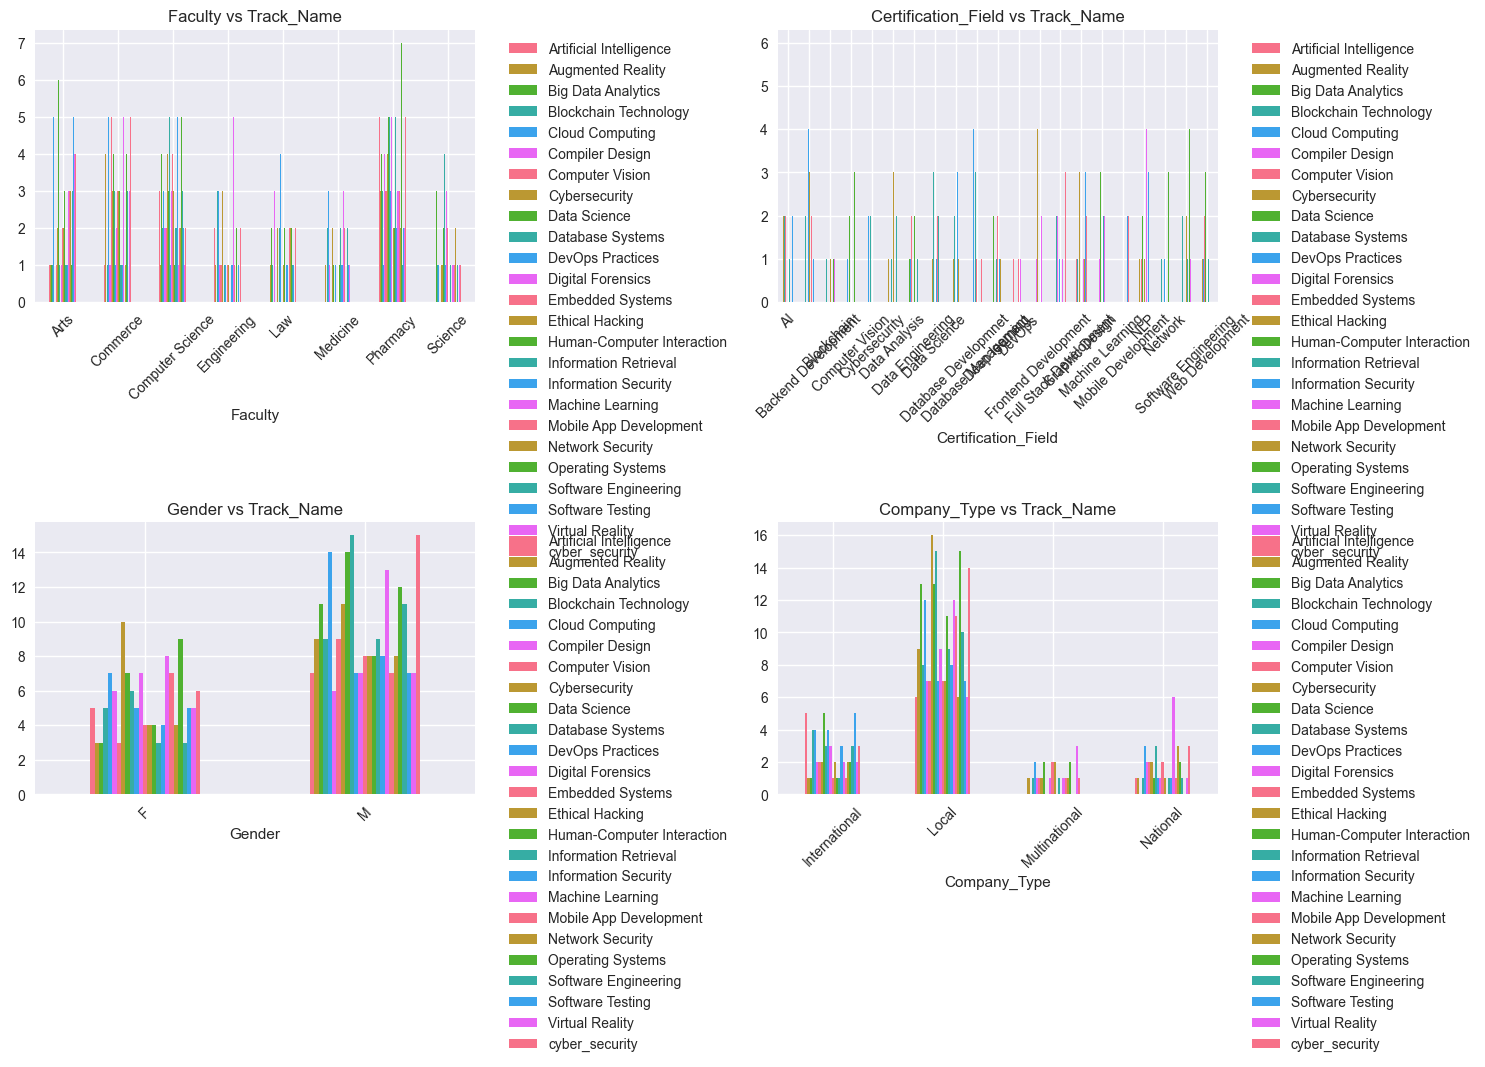

In [25]:
# Correlation analysis between categorical features and target
plt.figure(figsize=(15, 10))
correlation_features = ['Faculty', 'Certification_Field', 'Gender', 'Company_Type']
for i, feature in enumerate(correlation_features):
    if feature in df_processed.columns:
        plt.subplot(2, 2, i+1)
        pd.crosstab(df_processed[feature], df_processed['Track_Name']).plot(kind='bar', ax=plt.gca())
        plt.title(f'{feature} vs Track_Name')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [27]:
print("\n=== STEP 4: FEATURE ENGINEERING ===")
# Create new features
df_processed['Cert_Faculty_Match'] = (df_processed['Certification_Field'].str.contains('Computer|Data|AI|ML|Backend|Frontend|Database',
                                                                                       case=False, na=False) & 
                                     df_processed['Faculty'].str.contains('Computer|Engineering', case=False, na=False)).astype(int)

df_processed['Job_Cert_Alignment'] = (df_processed['Jop_Category'] == df_processed['Certification_Field']).astype(int)



=== STEP 4: FEATURE ENGINEERING ===


,Gender,Faculty,Certification_Field,Certification_Soutce,Company_Name,Company_location,Company_Type,Company_Filed,Jop_Category,Jop_Title,Track_Name,Track_Branch,Dept_Name,Cert_Faculty_Match,Job_Cert_Alignment,Is_Cairo,Experience_Level
0,M,Commerce,Backend Development,LinkedIn Learning,Cisco,USA,Local,Technology,Cybersecurity,Data Scientist,cyber_security,ITI - Cairo,Cybersecurity,0,0,0,Junior
1,M,Law,Backend Development,LinkedIn Learning,Elsewedy Electric,Egypt,Local,E-Commerce,Machine Learning,Backend Developer,cyber_security,ITI - Cairo,Cybersecurity,0,0,0,Mid
2,M,Pharmacy,Database Developmnet,DataCamp,Procter & Gamble,KSA,Local,Healthcare,Web Development,Full Stack Developer,cyber_security,ITI - Cairo,Cybersecurity,0,0,0,Mid
3,M,Medicine,Graphic Design,LinkedIn Learning,Rameda,Egypt,Local,Entertainment,Data Analysis,Frontend Developer,Software Testing,ITI - Cairo,Information Systems,0,0,0,Mid
4,F,Pharmacy,Graphic Design,LinkedIn Learning,Rameda,Egypt,Local,Agriculture,Cybersecurity,Frontend Developer,Software Testing,ITI - Cairo,Information Systems,0,0,0,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,M,Commerce,Backend Development,Codecademy,HSBC Egypt,Egypt,Local,Tourism,Machine Learning,Software Engineer,cyber_security,ITI - South Sinai,Cybersecurity,0,0,0,Mid
369,M,Arts,AI,edX,National Bank of Egypt,Egypt,International,Agriculture,UI/UX Design,System Administrator,Software Testing,ITI - South Sinai,Information Systems,0,0,0,Junior
370,M,Arts,AI,edX,National Bank of Egypt,Egypt,International,Agriculture,Digital Marketing,System Administrator,Software Testing,ITI - South Sinai,Information Systems,0,0,0,Junior
371,F,Pharmacy,Network,DataCamp,WE Telecom Egypt,Egypt,Local,Transportation,Video Editing,Frontend Developer,Digital Forensics,ITI - South Sinai,Cybersecurity,0,0,0,Mid


In [44]:
df_processed['Is_Egypt'] = (df_processed['Company_location'] == 'Egypt').astype(int)

In [45]:
df_processed['Is_Egypt'].value_counts()[1]

np.int64(318)

In [46]:
# Create experience level based on job title
experience_mapping = {
    'Junior': ['Junior', 'Assistant', 'Entry'],
    'Mid': ['Developer', 'Analyst', 'Engineer'],
    'Senior': ['Senior', 'Lead', 'Manager', 'Specialist']
}

In [47]:
df_processed['Experience_Level'] = 'Junior'  # Default
for level, keywords in experience_mapping.items():
    for keyword in keywords:
        mask = df_processed['Jop_Title'].str.contains(keyword, case=False, na=False)
        df_processed.loc[mask, 'Experience_Level'] = level

In [48]:
print("New features created:")
print(f"- Cert_Faculty_Match: {df_processed['Cert_Faculty_Match'].sum()} matches")
print(f"- Job_Cert_Alignment: {df_processed['Job_Cert_Alignment'].sum()} aligned")
print(f"- Is_Cairo: {df_processed['Is_Egypt'].sum()} Cairo-based")
print(f"- Experience_Level distribution: {df_processed['Experience_Level'].value_counts().to_dict()}")

New features created:
- Cert_Faculty_Match: 48 matches
- Job_Cert_Alignment: 8 aligned
- Is_Cairo: 318 Cairo-based
- Experience_Level distribution: {'Mid': 256, 'Junior': 84, 'Senior': 33}


In [49]:
# Define features for modeling
feature_columns = [
    'Gender', 'Faculty', 'Certification_Field', 'Certification_Soutce',
    'Company_Type', 'Company_location', 'Jop_Category', 'Jop_Title',
    'Cert_Faculty_Match', 'Job_Cert_Alignment', 'Is_Egypt', 'Experience_Level']


In [50]:
# Filter features that exist in the dataset
available_features = [col for col in feature_columns if col in df_processed.columns]
print(f"Available features for modeling: {available_features}")

Available features for modeling: ['Gender', 'Faculty', 'Certification_Field', 'Certification_Soutce', 'Company_Type', 'Company_location', 'Jop_Category', 'Jop_Title', 'Cert_Faculty_Match', 'Job_Cert_Alignment', 'Is_Egypt', 'Experience_Level']


In [51]:
# Prepare data for modeling
X = df_processed[available_features].copy()
y = df_processed['Track_Name'].copy()

In [52]:
# Label encode all categorical features
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

In [53]:
# Label encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [54]:
# Feature selection using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=min(10, len(available_features)))
X_selected = selector.fit_transform(X, y_encoded)
selected_features = [available_features[i] for i in selector.get_support(indices=True)]

print(f"Selected features: {selected_features}")

Selected features: ['Gender', 'Faculty', 'Certification_Field', 'Certification_Soutce', 'Company_Type', 'Jop_Category', 'Jop_Title', 'Job_Cert_Alignment', 'Is_Egypt', 'Experience_Level']


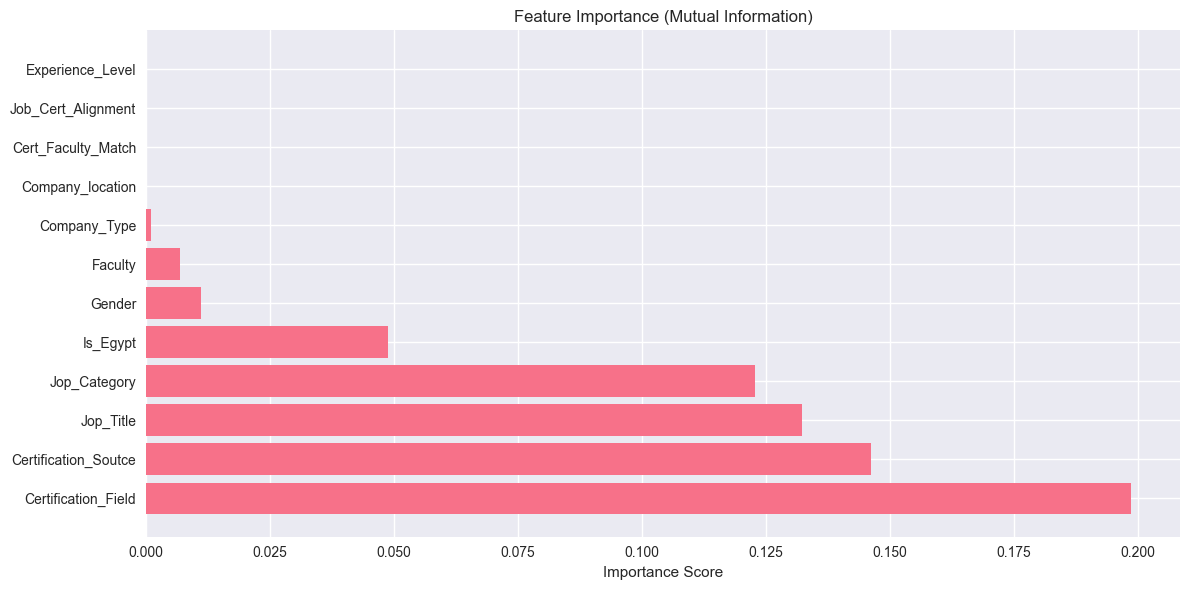

In [55]:
# Visualize feature importance
feature_scores = selector.scores_
plt.figure(figsize=(12, 6))
feature_importance_df = pd.DataFrame({
    'Feature': available_features,
    'Importance': feature_scores
}).sort_values('Importance', ascending=False)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance (Mutual Information)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [56]:
print("\n=== STEP 6: DATA AUGMENTATION ===")

# Create augmented dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y_encoded)

print(f"Original dataset size: {len(X_selected)}")
print(f"Augmented dataset size: {len(X_resampled)}")


=== STEP 6: DATA AUGMENTATION ===
Original dataset size: 373
Augmented dataset size: 525


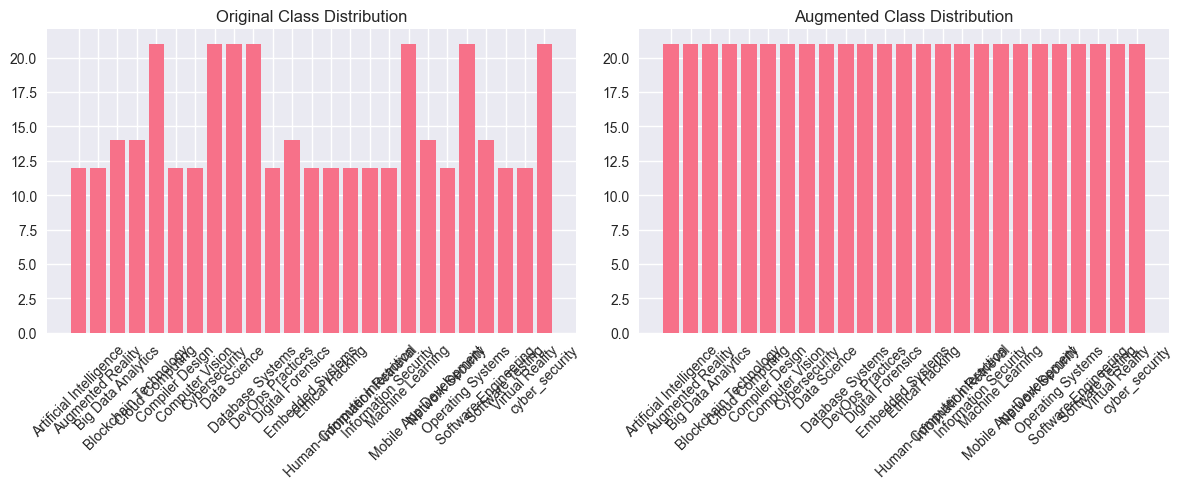

In [58]:
# Visualize class distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
unique, counts = np.unique(y_encoded, return_counts=True)
plt.bar([le_target.classes_[i] for i in unique], counts)
plt.title('Original Class Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
unique, counts = np.unique(y_resampled, return_counts=True)
plt.bar([le_target.classes_[i] for i in unique], counts)
plt.title('Augmented Class Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [59]:
print("\n=== STEP 7: MODEL TRAINING AND EVALUATION ===")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


=== STEP 7: MODEL TRAINING AND EVALUATION ===


In [60]:
# Define models to compare
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)
}

# Train and evaluate models
model_results = {}
cv_scores = {}

In [61]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_scores[name] = scores
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': scores.mean(),
        'cv_std': scores.std()
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, CV Score: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")


Training Random Forest...
Random Forest - Accuracy: 0.4286, CV Score: 0.3000 (+/- 0.0486)

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.3810, CV Score: 0.2786 (+/- 0.1071)

Training Logistic Regression...
Logistic Regression - Accuracy: 0.1238, CV Score: 0.1024 (+/- 0.0614)

Training SVM...
SVM - Accuracy: 0.1143, CV Score: 0.1286 (+/- 0.0462)


([0, 1, 2, 3],
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'Gradient Boosting'),
  Text(2, 0, 'Logistic Regression'),
  Text(3, 0, 'SVM')])

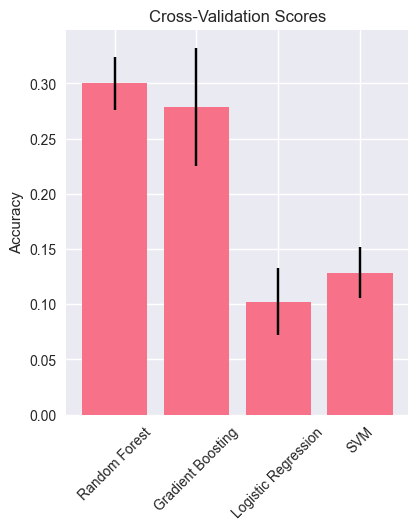

In [62]:
# Visualize model comparison
plt.figure(figsize=(15, 5))

# CV scores comparison
plt.subplot(1, 3, 1)
cv_means = [model_results[name]['cv_mean'] for name in models.keys()]
cv_stds = [model_results[name]['cv_std'] for name in models.keys()]
plt.bar(models.keys(), cv_means, yerr=cv_stds, capsize=5)
plt.title('Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'Gradient Boosting'),
  Text(2, 0, 'Logistic Regression'),
  Text(3, 0, 'SVM')])

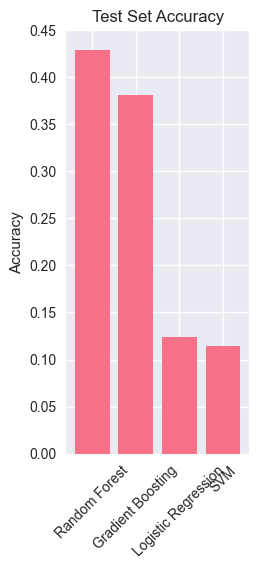

In [63]:
# Test accuracy comparison
plt.subplot(1, 3, 2)
test_accuracies = [model_results[name]['accuracy'] for name in models.keys()]
plt.bar(models.keys(), test_accuracies)
plt.title('Test Set Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

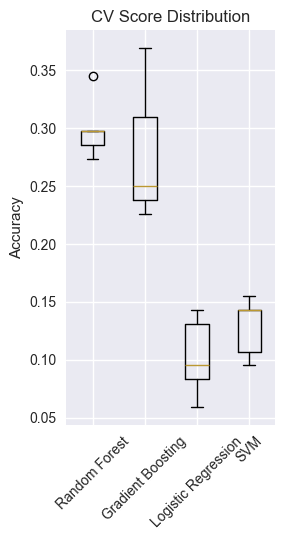

In [64]:
# Box plot of CV scores
plt.subplot(1, 3, 3)
cv_data = [cv_scores[name] for name in models.keys()]
plt.boxplot(cv_data, labels=models.keys())
plt.title('CV Score Distribution')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [65]:
print("\n=== STEP 8: HYPERPARAMETER TUNING ===")

# Select best model for hyperparameter tuning
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['accuracy'])
print(f"Best model: {best_model_name}")

# Hyperparameter tuning for Random Forest (typically best for categorical data)
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    
else:
    best_model = model_results[best_model_name]['model']


=== STEP 8: HYPERPARAMETER TUNING ===
Best model: Random Forest
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [66]:
# Final evaluation
y_pred_final = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final model accuracy: {final_accuracy:.4f}")

Final model accuracy: 0.4476


In [67]:
print("\n=== STEP 9: FINAL RESULTS AND VISUALIZATION ===")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=le_target.classes_))


=== STEP 9: FINAL RESULTS AND VISUALIZATION ===

Classification Report:
                            precision    recall  f1-score   support

   Artificial Intelligence       0.25      0.25      0.25         4
         Augmented Reality       0.67      0.50      0.57         4
        Big Data Analytics       0.57      1.00      0.73         4
     Blockchain Technology       0.50      0.75      0.60         4
           Cloud Computing       0.50      0.25      0.33         4
           Compiler Design       1.00      0.25      0.40         4
           Computer Vision       0.80      0.80      0.80         5
             Cybersecurity       0.00      0.00      0.00         5
              Data Science       0.00      0.00      0.00         4
          Database Systems       0.20      0.25      0.22         4
          DevOps Practices       0.67      0.40      0.50         5
         Digital Forensics       0.50      0.50      0.50         4
          Embedded Systems       0.50     

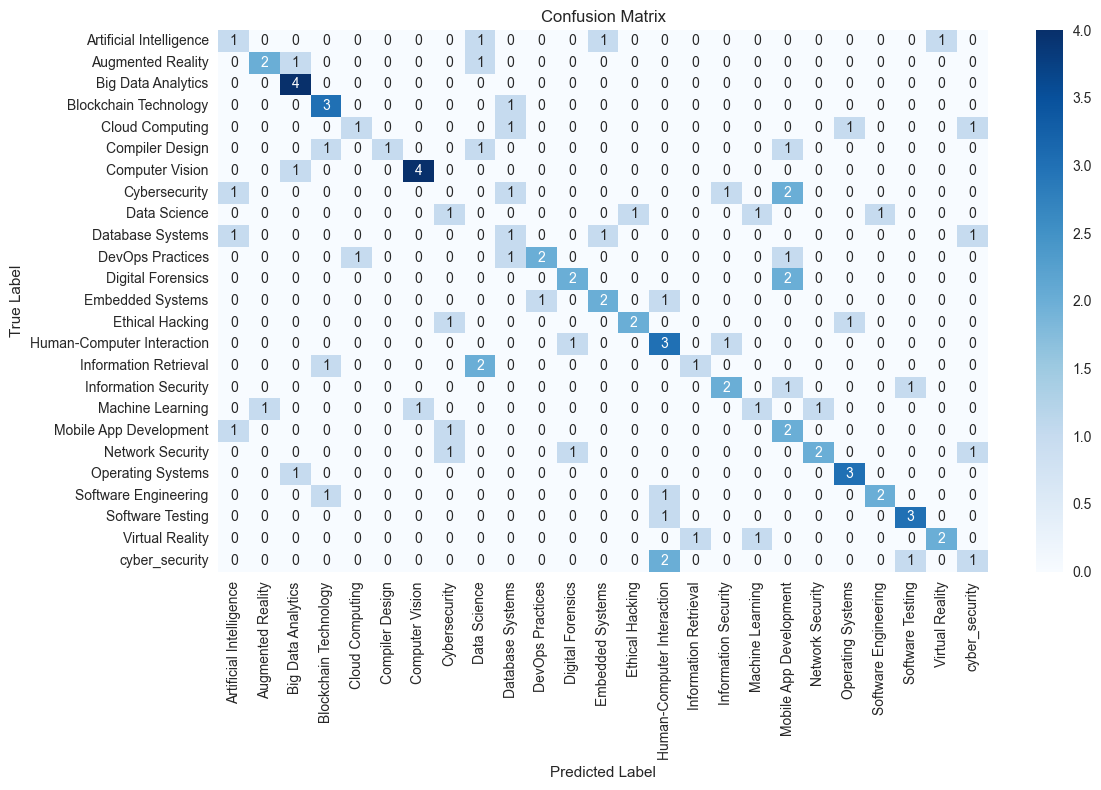

In [68]:
# Confusion matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

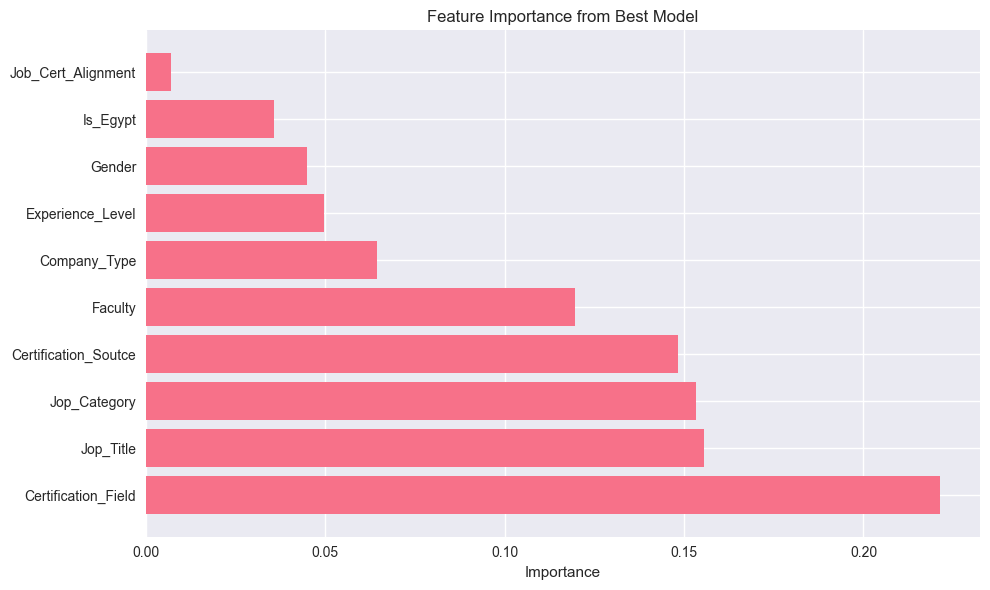

In [69]:
# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title('Feature Importance from Best Model')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

In [70]:
# Save the model and encoders
import joblib
import os

model_dir = 'track_prediction_model'
os.makedirs(model_dir, exist_ok=True)

# Save model
joblib.dump(best_model, os.path.join(model_dir, 'best_model.pkl'))

# Save label encoders
for col, encoder in label_encoders.items():
    joblib.dump(encoder, os.path.join(model_dir, f'le_{col}.pkl'))

# Save target encoder
joblib.dump(le_target, os.path.join(model_dir, 'le_target.pkl'))

# Save feature selector
joblib.dump(selector, os.path.join(model_dir, 'feature_selector.pkl'))

# Save selected features list
with open(os.path.join(model_dir, 'selected_features.txt'), 'w') as f:
    for feature in selected_features:
        f.write(f"{feature}\n")

print(f"Model and encoders saved to '{model_dir}' directory")

Model and encoders saved to 'track_prediction_model' directory

=== STEP 11: PREDICTION EXAMPLE ===


In [72]:
# Example prediction
def predict_track(sample_data):
    # Load saved components
    model = joblib.load(os.path.join(model_dir, 'best_model.pkl'))
    target_encoder = joblib.load(os.path.join(model_dir, 'le_target.pkl'))
    feat_selector = joblib.load(os.path.join(model_dir, 'feature_selector.pkl'))
    
    # Prepare sample data
    sample_df = pd.DataFrame([sample_data])
    
    # Add engineered features
    sample_df['Cert_Faculty_Match'] = (sample_df['Certification_Field'].str.contains('Computer|Data|AI|ML|Backend|Frontend|Database', case=False, na=False) & 
                                      sample_df['Faculty'].str.contains('Computer|Engineering', case=False, na=False)).astype(int)
    sample_df['Job_Cert_Alignment'] = (sample_df['Jop_Category'] == sample_df['Certification_Field']).astype(int)
    sample_df['Is_Egypt'] = (sample_df['Company_location'] == 'Egypt').astype(int)
    sample_df['Experience_Level'] = 'Mid'  # Default
    
    # Encode categorical variables
    for col in sample_df.columns:
        if col in label_encoders and sample_df[col].dtype == 'object':
            try:
                sample_df[col] = label_encoders[col].transform(sample_df[col].astype(str))
            except ValueError:
                # Handle unknown categories
                sample_df[col] = 0
    
    # Select features
    sample_selected = feat_selector.transform(sample_df[available_features])
    
    # Make prediction
    prediction = model.predict(sample_selected)[0]
    predicted_track = target_encoder.inverse_transform([prediction])[0]
    
    # Get prediction probabilities
    probabilities = model.predict_proba(sample_selected)[0]
    
    return predicted_track, probabilities

# Test prediction
sample_student = {
    'Gender': 'M',
    'Faculty': 'Computer Science',
    'Certification_Field': 'Machine Learning',
    'Certification_Soutce': 'Coursera',
    'Company_Type': 'International',
    'Company_location': 'Cairo',
    'Jop_Category': 'Data Analysis',
    'Jop_Title': 'Data Scientist'
}

predicted_track, probabilities = predict_track(sample_student)
print(f"Predicted Track: {predicted_track}")
print(f"Prediction Probabilities: {dict(zip(le_target.classes_, probabilities))}")

print("\n=== PIPELINE COMPLETED SUCCESSFULLY ===")
print(f"Final model accuracy: {final_accuracy:.4f}")
print(f"Number of features used: {len(selected_features)}")
print(f"Dataset size after augmentation: {len(X_resampled)}")

Predicted Track: Artificial Intelligence
Prediction Probabilities: {'Artificial Intelligence': np.float64(0.265), 'Augmented Reality': np.float64(0.04), 'Big Data Analytics': np.float64(0.0), 'Blockchain Technology': np.float64(0.026666666666666665), 'Cloud Computing': np.float64(0.05), 'Compiler Design': np.float64(0.005), 'Computer Vision': np.float64(0.02), 'Cybersecurity': np.float64(0.005), 'Data Science': np.float64(0.005), 'Database Systems': np.float64(0.005), 'DevOps Practices': np.float64(0.055), 'Digital Forensics': np.float64(0.005), 'Embedded Systems': np.float64(0.015), 'Ethical Hacking': np.float64(0.0), 'Human-Computer Interaction': np.float64(0.02), 'Information Retrieval': np.float64(0.14), 'Information Security': np.float64(0.08), 'Machine Learning': np.float64(0.015), 'Mobile App Development': np.float64(0.12), 'Network Security': np.float64(0.02), 'Operating Systems': np.float64(0.03833333333333333), 'Software Engineering': np.float64(0.01), 'Software Testing': np.